<a href="https://colab.research.google.com/github/Simurgh818/BMED_6517_emotional_state_classifier/blob/main/DEAP_CNN_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing our git repo
import os
if not os.path.exists('/content/BMED_6517_emotional_state_classifier'):
  !wget https://github.com/Simurgh818/BMED_6517_emotional_state_classifier/blob/main/requirements.txt -q --show-progress --progress=dot
  !git clone https://github.com/Simurgh818/BMED_6517_emotional_state_classifier.git


     0K .......... .......... .......... .......... .......... 13.6M
    50K .......... .......... .......... .......... .......... 15.5M
   100K .......... .......... .......... .......... .......... 15.8M
   150K .......... .......... ..                               14.3M=0.01sCloning into 'BMED_6517_emotional_state_classifier'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 133 (delta 4), reused 13 (delta 1), pack-reused 114
Receiving objects: 100% (133/133), 78.21 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
# Importing the preprocessed dataset files
!wget https://drive.google.com/drive/folders/1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing

--2022-12-02 01:49:23--  https://drive.google.com/drive/folders/1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.4.102, 142.250.4.113, 142.250.4.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.4.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing’

1_9n-kRKkpnCC2wVovO     [ <=>                ] 221.03K  --.-KB/s    in 0.09s   

2022-12-02 01:49:23 (2.44 MB/s) - ‘1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing’ saved [226338]



In [ ]:
# import data from numpy arrays
import numpy as np

loaded_features = np.load('/content/BMED_6517_emotional_state_classifier/results/npy/EEG_features.npy', allow_pickle=True)

connectivityMatrix = loaded_features.item().get('connectivity_matrix')
connectivityLinear = loaded_features.item().get('connectivity_linear')
wavelet = loaded_features.item().get('waveletEntropy')
Valence = loaded_features.item().get('Valence')
Arousal = loaded_features.item().get('Arousal')
Classes = loaded_features.item().get('Classes')

print(connectivityMatrix.shape)
print(connectivityLinear.shape)
print(wavelet.shape)
print(Valence.shape)
print(Arousal.shape)
print(Classes.shape)

(880, 5, 32, 32)
(880, 5, 512)
(880, 32, 6)
(880,)
(880,)
(880,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#dataset_labels = np.load('content/gdrive/MyDrive/Colab Notebooks/Copy of labels_1_22.npy', mmap_mode='r')

In [ ]:
#dataset_name1 = 'Copy of bipolar_feats.npy'

#dataset_bipolarfts = np.load(dataset_name1, encoding='bytes')

In [ ]:
#dataset_name2 = 'Copy of labels_1_22.npy'

#dataset_labels = np.load(dataset_name2, encoding='bytes')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

In [ ]:
print(np.shape(Classes))
print(np.unique(Classes))

(880,)
[0. 1. 2. 3.]


In [ ]:
# Class balance check:
labels = ['Classes']
zeros = [Classes[Classes == 0].shape[0]]
ones = [Classes[Classes == 1].shape[0]]
twos = [Classes[Classes == 2].shape[0]]
threes = [Classes[Classes == 3].shape[0]]

x = np.arange(1)  # the label locations
width = 0.25  # the width of the bars

print(ones)

[172]


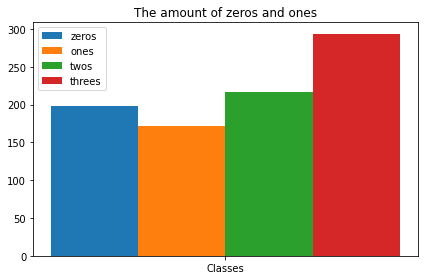

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, zeros, width, label='zeros')
rects2 = ax.bar(x - width/2, ones, width, label='ones')
rects3 = ax.bar(x + width/2, twos, width, label='twos')
rects4 = ax.bar(x + 1.5*width, threes, width, label='threes')

ax.set_title('The amount of zeros and ones')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

In [ ]:
# Rebalance classes based on class 1 = 172: Take the first 172 from class 0,2 and 3.
zero_mask = (Classes == 0)
one_mask = (Classes == 1)
two_mask = (Classes == 2)
three_mask = (Classes == 3)
size = 128

Classes_bl = np.concatenate([Classes[zero_mask][:size],Classes[one_mask][:size],
                            Classes[two_mask][:size],Classes[three_mask][:size]])
print(np.shape(Classes_bl),'\n 128*4 is: ', 128*4)

connectivityMatrix_bl = np.concatenate([connectivityMatrix[zero_mask][:size],connectivityMatrix[one_mask][:size],
                            connectivityMatrix[two_mask][:size],connectivityMatrix[three_mask][:size]])
print(np.shape(connectivityMatrix_bl))

(512,) 
 128*4 is:  512
(512, 5, 32, 32)


In [ ]:
# balancing valence and arrousal
Valence_bl = np.concatenate([Valence[zero_mask][:size],Valence[one_mask][:size],
                            Valence[two_mask][:size],Valence[three_mask][:size]])
print('Valence shape is: ', np.shape(Valence_bl))

Arousal_bl = np.concatenate([Arousal[zero_mask][:size],Arousal[one_mask][:size],
                            Arousal[two_mask][:size],Arousal[three_mask][:size]])
print(''Arousal shape is: ', np.shape(Arousal_bl))

(512,) 
 128*4 is:  512
Valence shape is:  (512,) 
 Arousal shape is:  (512,)


In [ ]:
# Data Augmentation


In [ ]:
# Algorithm 1 for Convolutional Neural Model :
##Require: Training EEG Dataset nntrX, Training Valence/Arousal Values nntrY, Testing subject’s EEG
#Dataset nnteX, Testing Valence/Arousal Values nnteY
# cnn = model(trainX, trainY )

#x = dataset_bipolarfts
x = connectivityMatrix
#y = dataset_labels[1:881]
y = np.vstack([Valence,Arousal]).T
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y[np.where(y<4.5)] = 0
y[np.where(y>=4.5)] = 1
y_4_class = y[:,0]*2+y[:,1]
print(np.unique(y_4_class))
print(y_4_class.shape)
y_one_hot = np.zeros((y.shape[0],4))
y_one_hot[np.where(y_4_class==0),0] = 1
y_one_hot[np.where(y_4_class==1),1] = 1
y_one_hot[np.where(y_4_class==2),2] = 1
y_one_hot[np.where(y_4_class==3),3] = 1
print(np.unique(y_one_hot))
print(y_one_hot.shape)
print(np.sum(y_one_hot,axis=0))

[0. 1. 2. 3.]
(880,)
[0. 1.]
(880, 4)
[128. 206. 186. 360.]


In [84]:
val_size = 4
y_test = y_one_hot[:val_size*40,:]
x_test = x[:val_size*40,:,:,:]
y_train = y_one_hot[val_size*40:,:]
x_train = x[val_size*40:,:,:,:]
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(160, 5, 32, 32)
(352, 5, 32, 32)
(352, 4)


In [85]:
import keras
from keras import optimizers
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.callbacks import ModelCheckpoint
from keras.metrics import CategoricalAccuracy,CategoricalCrossentropy,Precision,Recall

In [86]:
from keras.layers.activation.relu import ReLU
def make_CNN_layers(input_mat):
  # layer 1
  model = Conv2D(16,(3,3),padding='same',input_shape=input_shape)(input_mat)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.2)(model)

  # layer 2
  model = Conv2D(32,(3,3),padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.2)(model)

  #layer 3
  model = Conv2D(64,(3,3),padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.5)(model)

  return model

In [87]:
input_shape = x_test[0,0].shape
input_shape = (32,32,1)
delta_input = Input(shape = input_shape)
delta_model = make_CNN_layers(delta_input)

theta_input = Input(shape = input_shape)
theta_model = make_CNN_layers(theta_input)

alpha_input = Input(shape = input_shape)
alpha_model = make_CNN_layers(alpha_input)

beta_input = Input(shape = input_shape)
beta_model = make_CNN_layers(beta_input)

gamma_input = Input(shape = input_shape)
gamma_model = make_CNN_layers(gamma_input)

conv = concatenate([delta_model,theta_model,alpha_model,beta_model,gamma_model])

conv = Flatten()(conv)

dense = Dense(512)(conv)
dense = ReLU()(dense)
dense = Dropout(0.3)(dense)

output = Dense(4,activation='softmax')(dense)

model = Model(inputs=[delta_input,theta_input,alpha_input,beta_input,gamma_input],
              outputs=[output])

opt = optimizers.SGD()

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc',Recall(),Precision()])

In [88]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                            

In [89]:
best_weights_file = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(best_weights_file,monitor='val_loss',verbose=1,save_best_only=True,mode='min')

callbacks = [checkpoint]
x_delta = x_train[:,0,:,:]
x_theta = x_train[:,1,:,:]
x_alpha = x_train[:,2,:,:]
x_beta = x_train[:,3,:,:]
x_gamma = x_train[:,4,:,:]
validation_data=([x_delta[:40],x_theta[:40],x_alpha[:40],x_beta[:40],x_gamma[:40]],y_train[:40])

train_history = model.fit([x_delta[40:],x_theta[40:],x_alpha[40:],x_beta[40:],x_gamma[40:]],y_train[40:],
          batch_size=16,epochs=1000,callbacks=callbacks,
          validation_data=validation_data,shuffle=True)

Epoch 1/1000
18/20 [==========================>...] - ETA: 0s - loss: 1.1843 - acc: 0.4479 - recall_2: 0.0938 - precision_2: 0.4737
Epoch 1: val_loss improved from inf to 1.47794, saving model to weights.best.hdf5
20/20 [==============================] - 2s 42ms/step - loss: 1.1702 - acc: 0.4519 - recall_2: 0.0994 - precision_2: 0.4769 - val_loss: 1.4779 - val_acc: 0.1750 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00
Epoch 2/1000
19/20 [===========================>..] - ETA: 0s - loss: 1.0963 - acc: 0.4342 - recall_2: 0.1382 - precision_2: 0.3750
Epoch 2: val_loss did not improve from 1.47794
20/20 [==============================] - 0s 12ms/step - loss: 1.0951 - acc: 0.4327 - recall_2: 0.1410 - precision_2: 0.3729 - val_loss: 1.5331 - val_acc: 0.1750 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00
Epoch 3/1000
17/20 [========================>.....] - ETA: 0s - loss: 1.0777 - acc: 0.4375 - recall_2: 0.2022 - precision_2: 0.4264
Epoch 3: val_loss improved from 1.47794

In [91]:
num_epochs = train_history.epoch[-1]+1
history = train_history.history

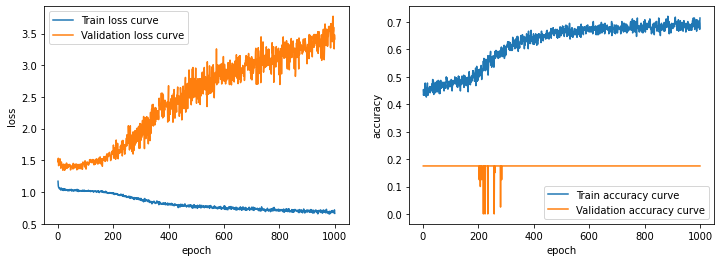

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].plot(range(1, num_epochs+1), history['loss'])
axes[0].plot(range(1, num_epochs+1), history['val_loss'])
axes[0].legend(['Train loss curve', 'Validation loss curve'])
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')


axes[1].plot(range(1, num_epochs+1), history['acc'])
axes[1].plot(range(1, num_epochs+1), history['val_acc'])
axes[1].legend(['Train accuracy curve', 'Validation accuracy curve'])
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.show()